### Netflix EDA
- 아래의 서비스에서 데이터를 수집하여 EDA를 수행하세요.


- flixpatrol 사이트에서 데이터 수집
    - `https://flixpatrol.com/top10/netflix/world/2021/full/#netflix-1`


- kaggle에서 netflix 컨텐츠 데이터 수집
    - `https://www.kaggle.com/shivamb/netflix-shows`


- 컨텐츠의 등급데이터는 아래의 코드 사용
```
ratings_ages = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                  'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                  'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                  'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}
```

#### EDA의 수행 절차
- 데이터 수집
- 결측 데이터의 처리
- 데이터 탐색
    - 수집한 데이터에서 자유롭게 주제를 선정하여 데이터 분석을 통한 인사이트 도출
    - 예시 : 인도영화는 다른 국가보다 러닝타임이 길것이다. 컨텐츠의 퀄리티가 가장 좋은 국가는?

In [4]:
# 개별 프로젝트 : 데이터 크롤링
# 조별 프로젝트 : 수집한 데이터로 EDA 수행(간단한 분석(상관관계) 및 시각화)

In [1]:
import pandas as pd

In [2]:
df_title = pd.read_csv("datas/netflix_titles.csv")
df_title.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [3]:
df_2021 = pd.read_csv("datas/netflix_point_2021.csv")
df_2021.tail(2)

,title,points,countries,days
150,Beauty and the Baker,"1,638",18,28
151,Zero Chill,"1,631",49,20


#### 컨텐츠 타입과 컨텐츠 등급별 컨텐츠의 비율

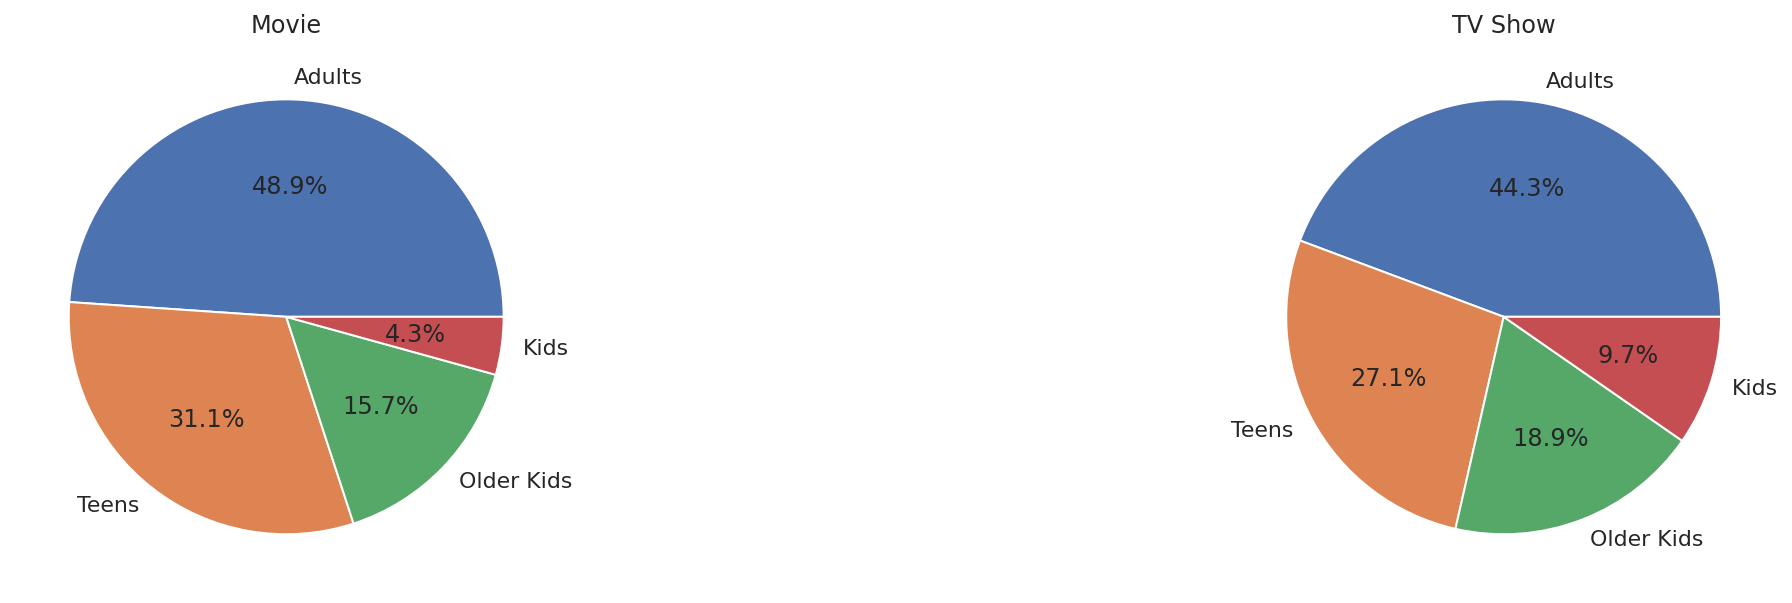

In [21]:
# 아래의 코드는 EDA의 예시를 보여주는 것으로 실제 코드가 동작되지 않습니다.

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.title("Movie")
plt.pie(movie_count.values, labels=movie_count.index, autopct="%1.1f%%")

plt.subplot(122)
plt.title("TV Show")
plt.pie(tv_count.values, labels=tv_count.index, autopct="%1.1f%%")

plt.show()

결론 : 영화가 TV쇼 보다 청소년 관람불가 등급의 비율이 더 높고 TV가 영화보다 청소년관람등급의 컨텐츠의 비율이 더 높습니다.

#### 데이터 전처리
- 결측데이터 확인
- 불필요한 컬럼제거
- 비어있는 데이터 제거, 채우기

In [33]:
import pandas as pd

In [34]:
df_title = pd.read_csv("datas/netflix_titles.csv")
df_title.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [35]:
# 결측데이터 확인 : missingno

In [37]:
# !pip install missingno

In [38]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [40]:
import matplotlib.pyplot as plt

In [41]:
import missingno as msno

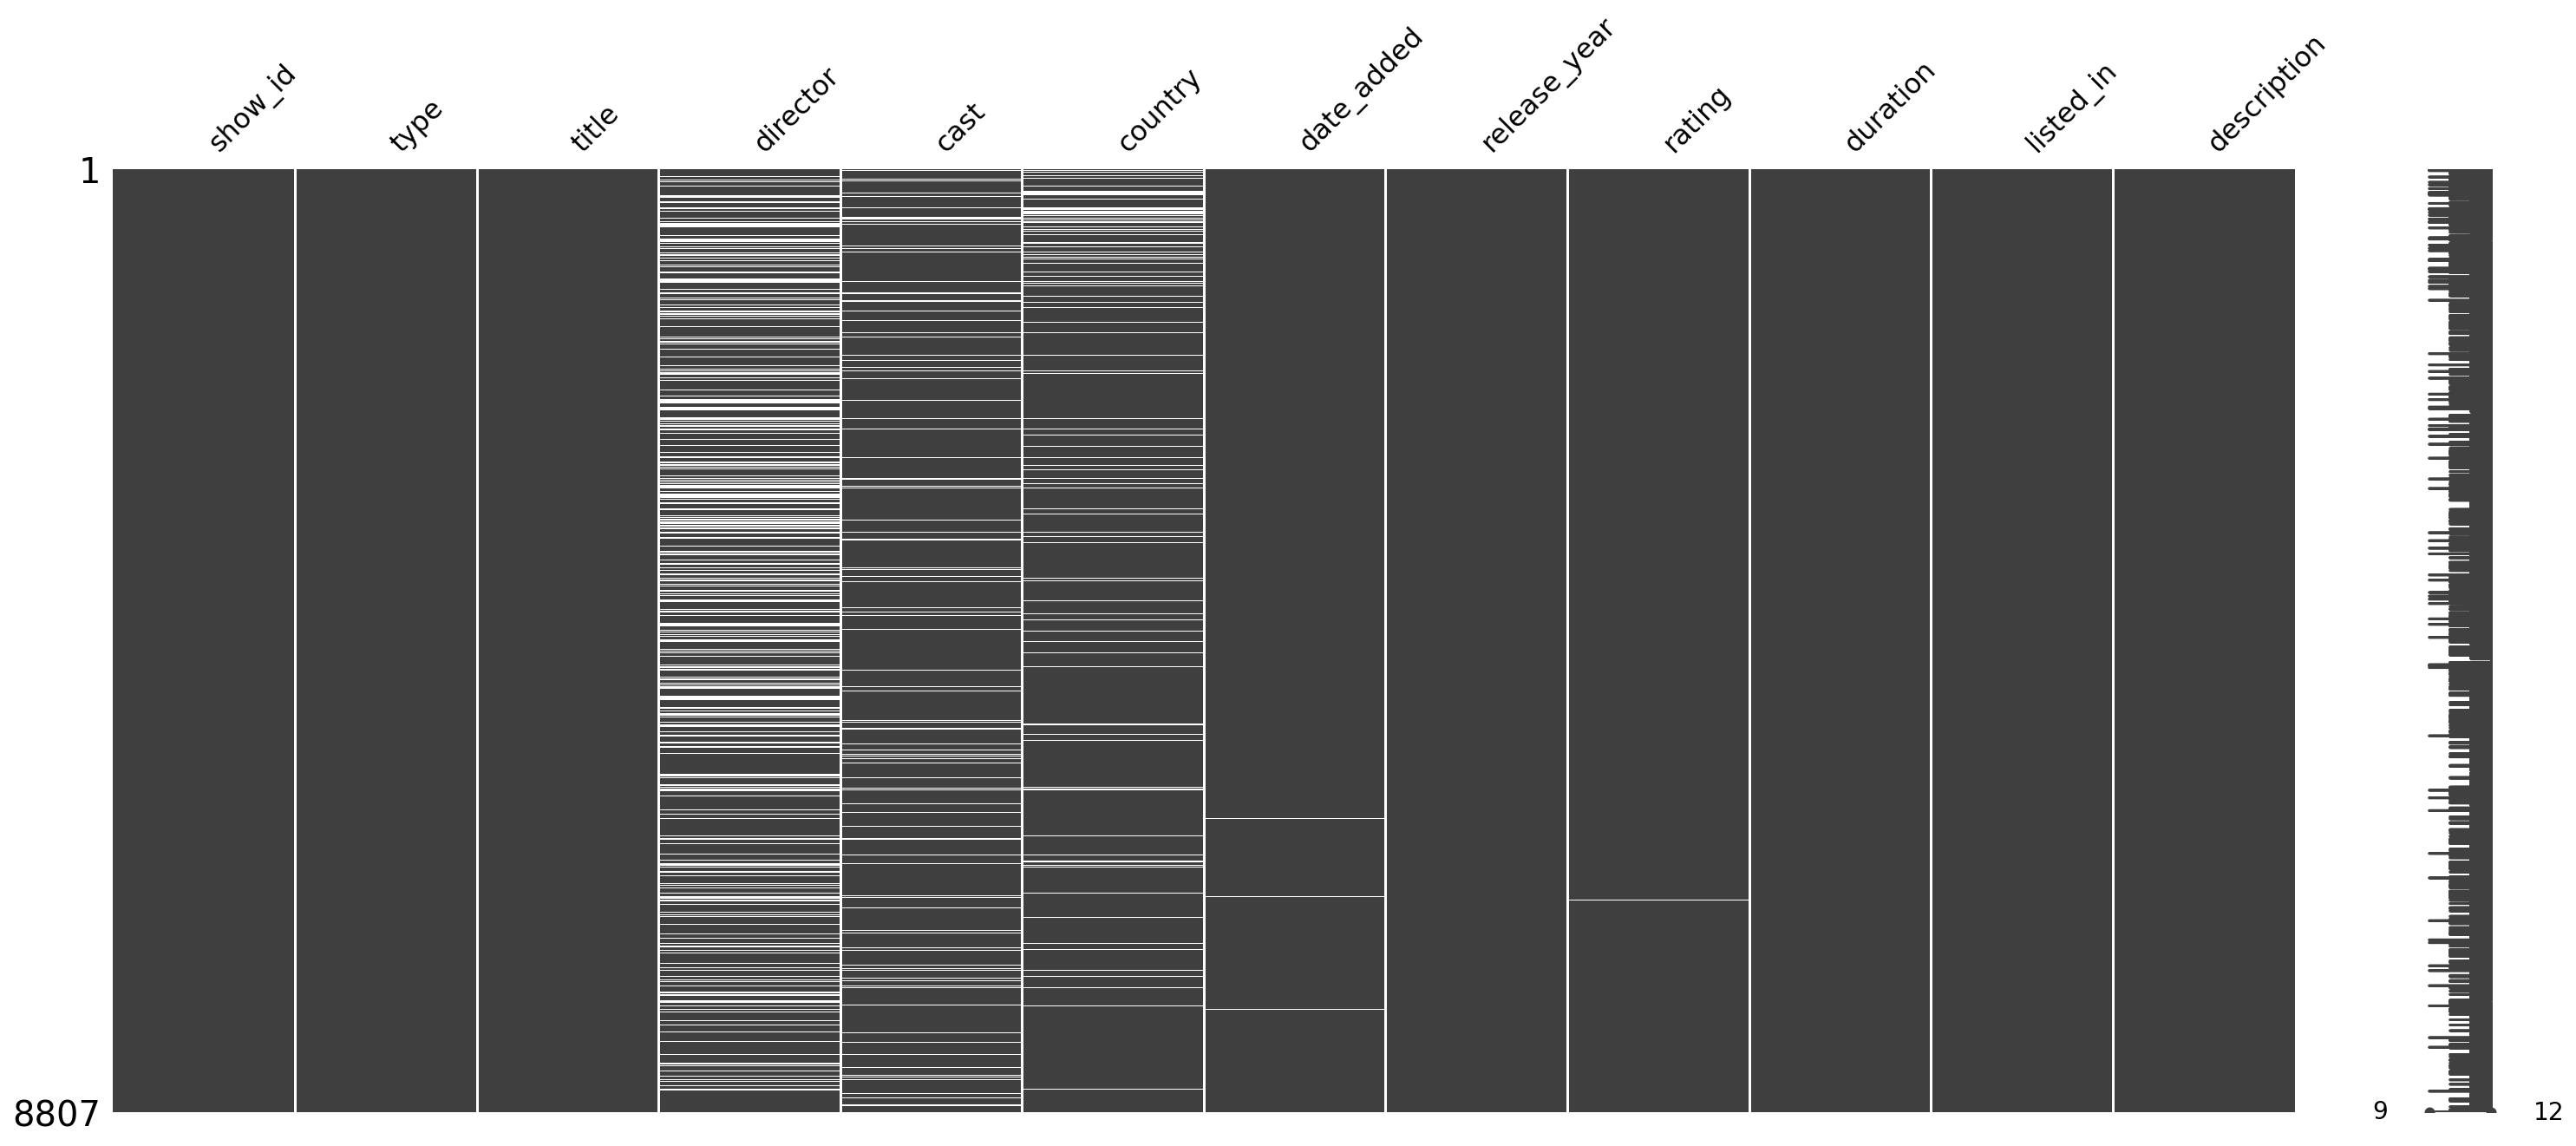

In [44]:
msno.matrix(df_title)
plt.show()

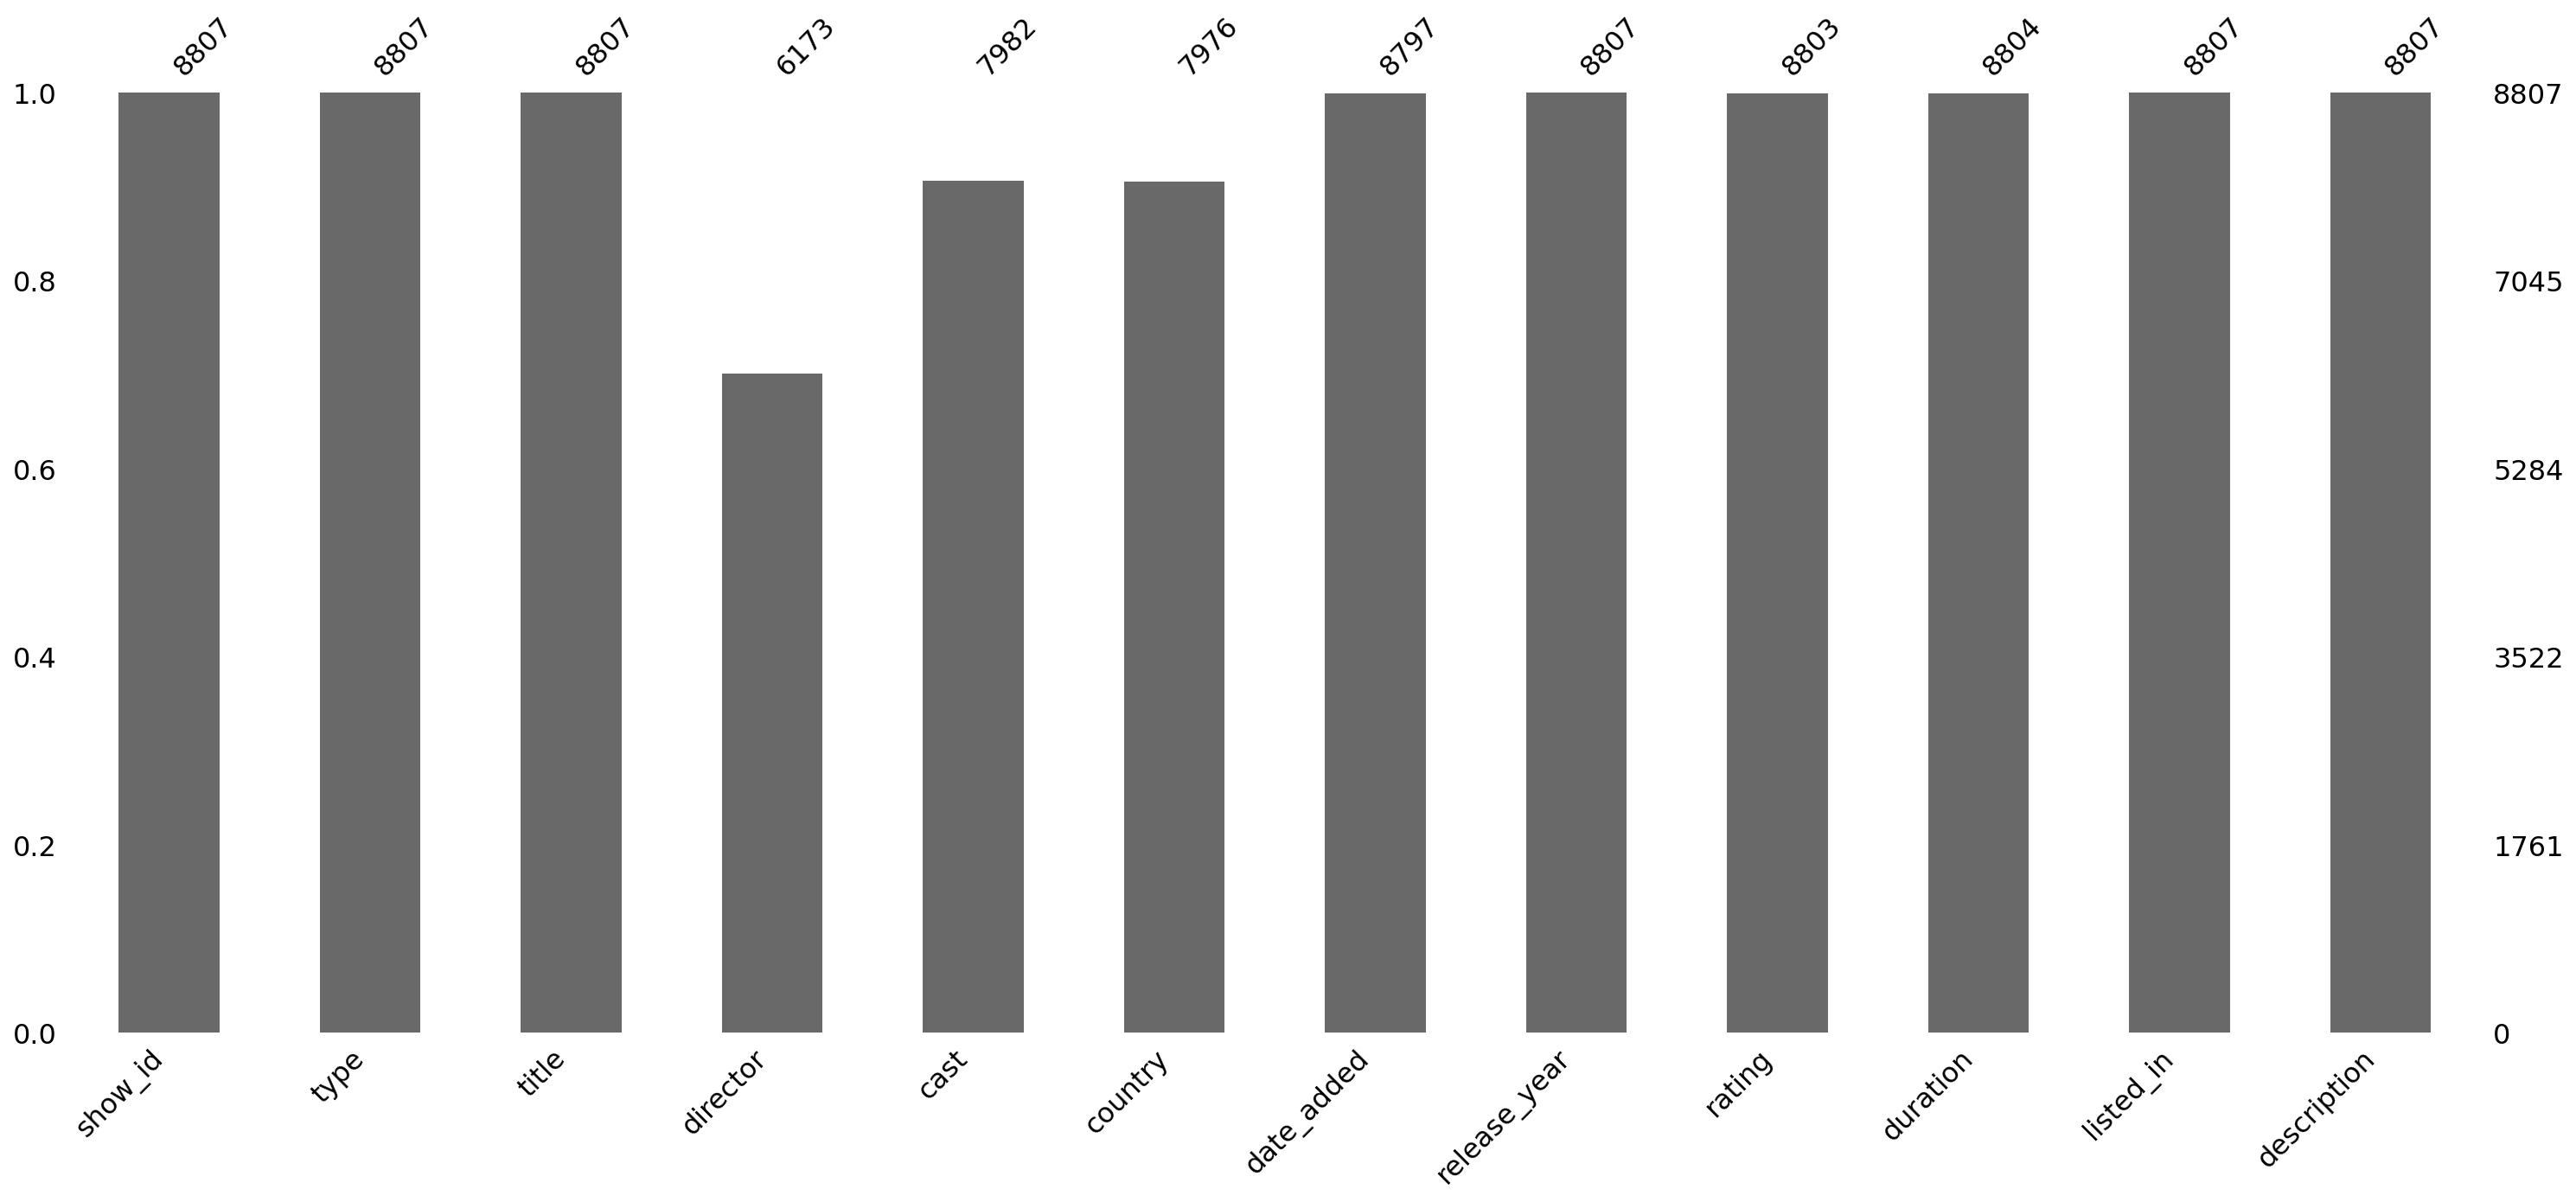

In [45]:
msno.bar(df_title)
plt.show()

In [46]:
# 불필요한 컬럼제거

In [49]:
rate = 0.8
int(len(df_title) * rate)

7045

In [50]:
filtered_df = df_title.dropna(thresh=int(len(df_title) * rate), axis=1)

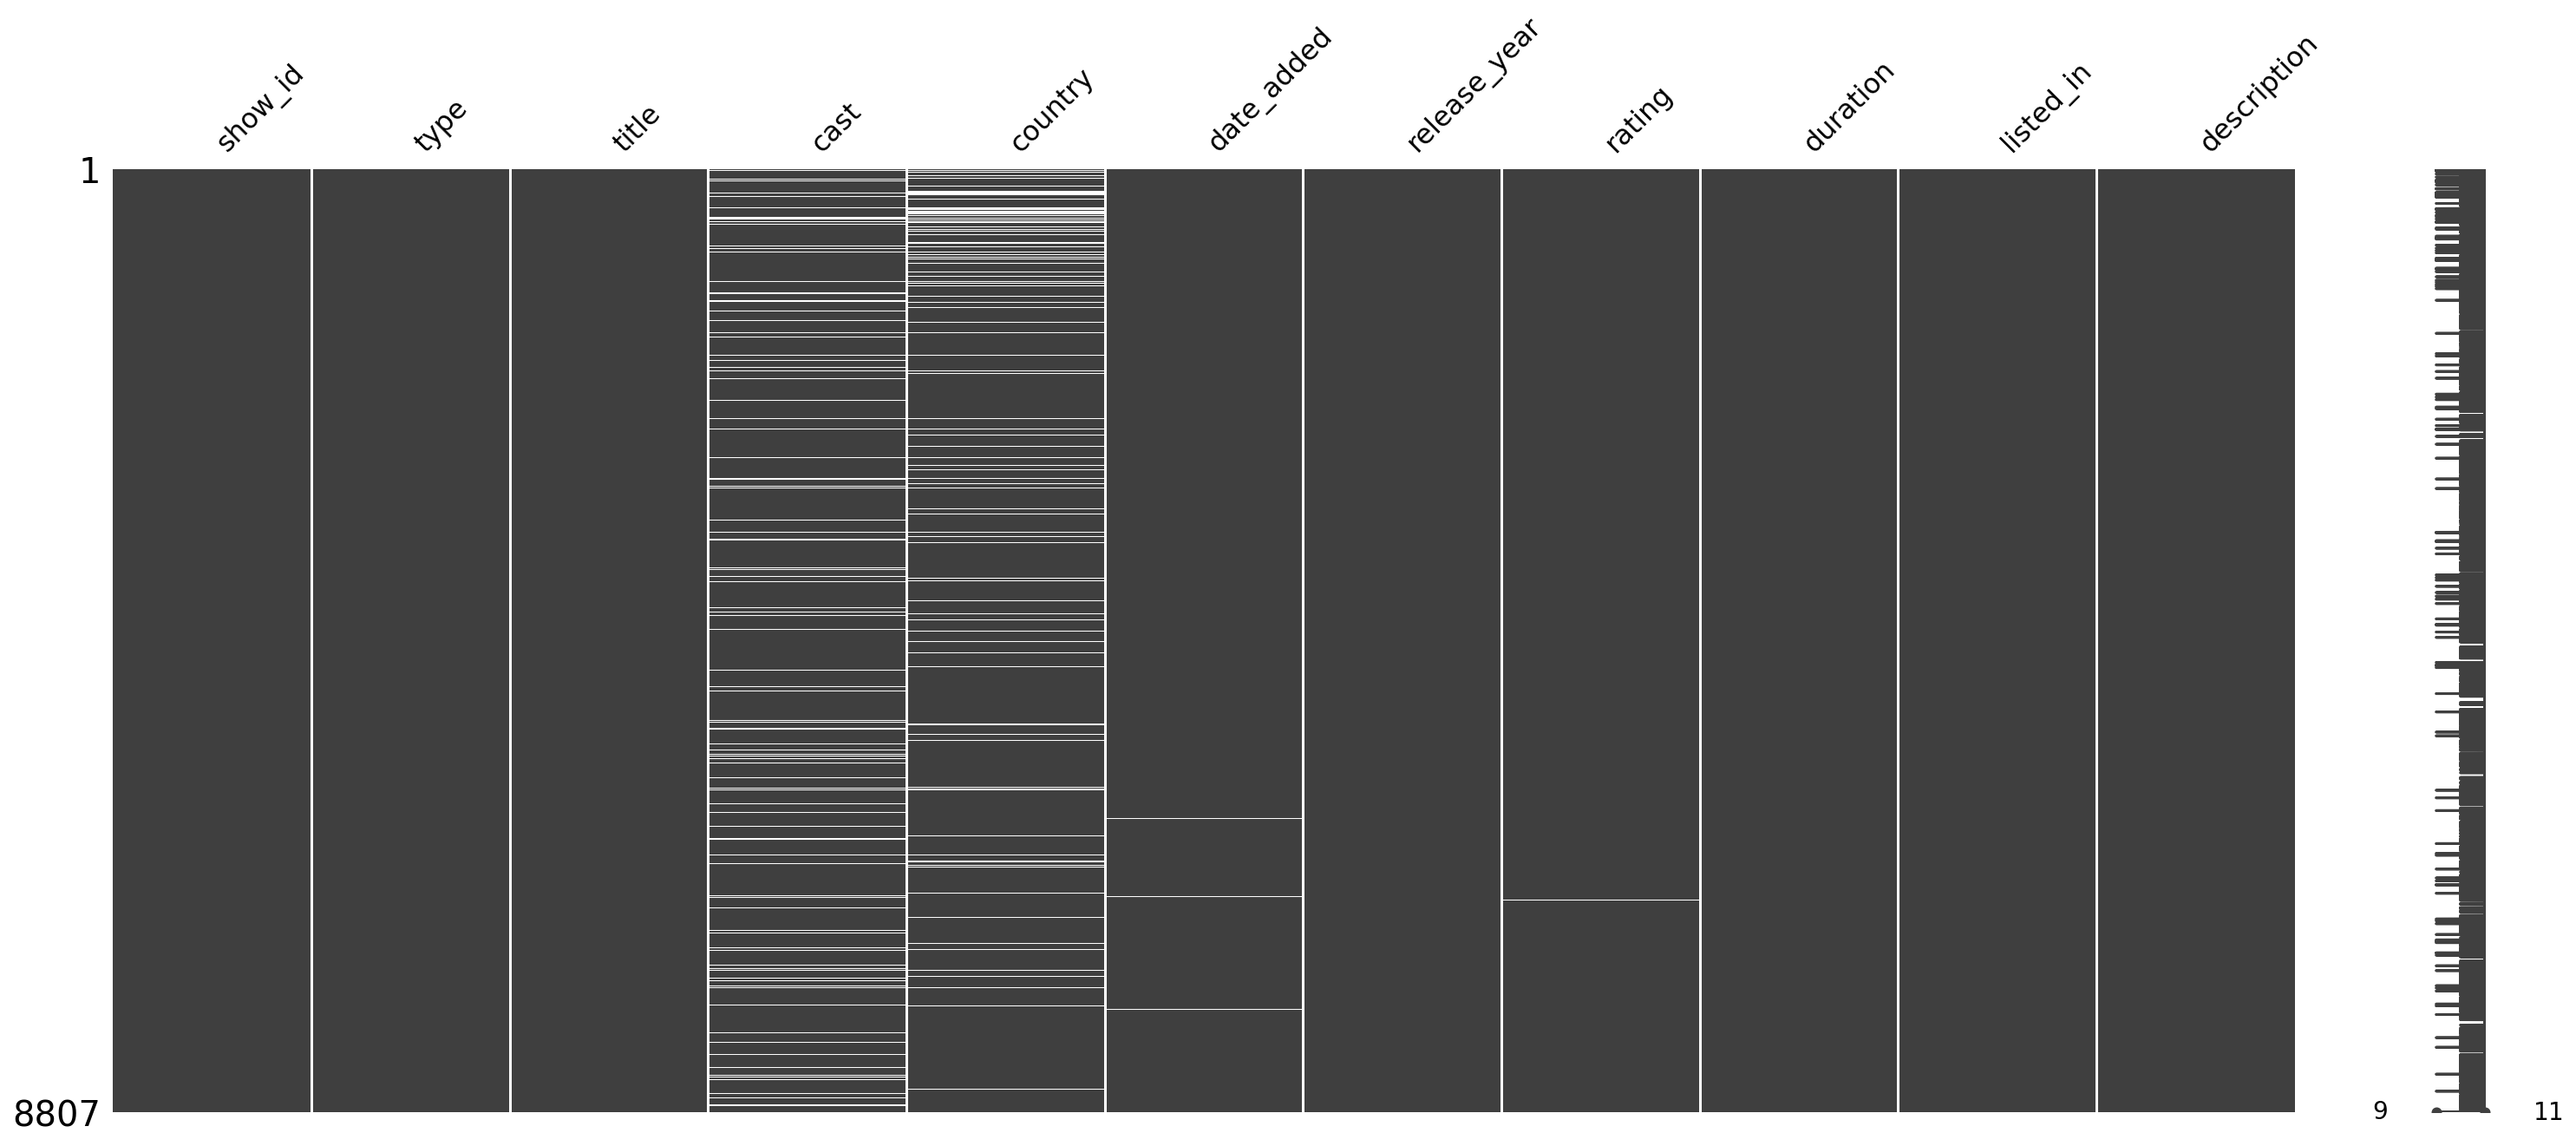

In [51]:
msno.matrix(filtered_df)
plt.show()

In [52]:
# 비어있는 데이터 처리

In [54]:
filtered_df["rating"][:3]

0    PG-13
1    TV-MA
2    TV-MA
Name: rating, dtype: object

In [56]:
filtered_df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [57]:
from sklearn.impute import SimpleImputer

In [58]:
imputer = SimpleImputer(strategy="most_frequent")

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
filtered_df["rating"] = imputer.fit_transform(filtered_df[["rating"]])

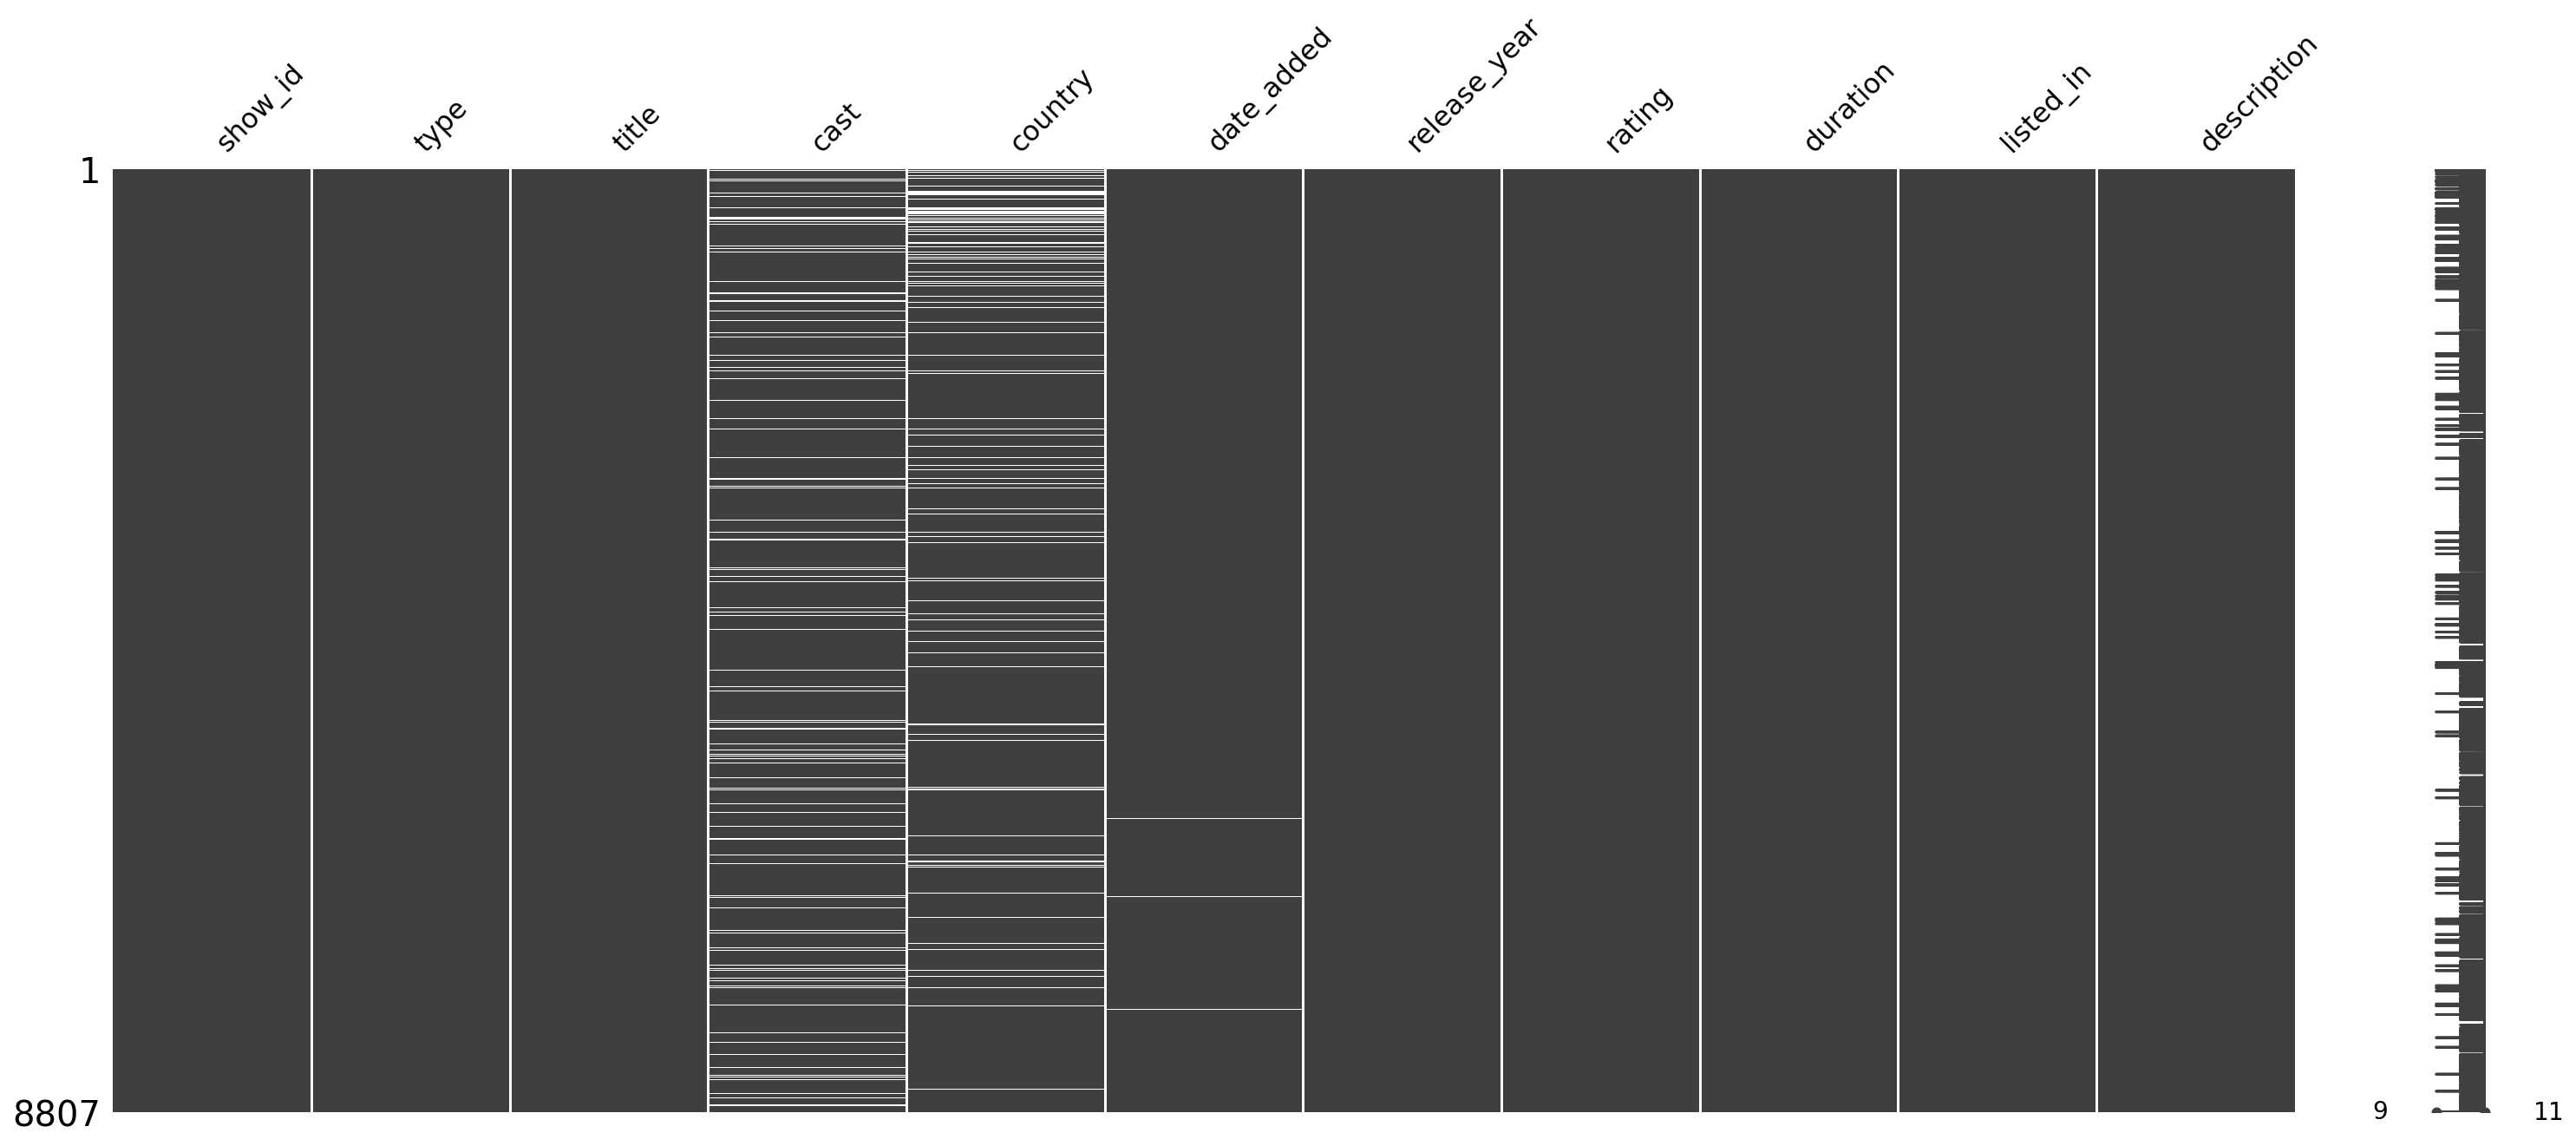

In [60]:
msno.matrix(filtered_df)
plt.show()